In [38]:
import numpy as np
import pandas as pd

In [2]:
data = "C:/Users/HP/Desktop/Hamoye Internship/STAGE A/fuel_ferc1.csv"
Energy_data = pd.read_csv(data)
print(Energy_data.head(n=5))

                record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   
3   f1_fuel_1994_12_2_0_7                 2         1994   
4  f1_fuel_1994_12_2_0_10                 2         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton        5377489.0   
1  rockport total plant                coal       ton       10486945.0   
2                gorgas                coal       ton        2978683.0   
3                 barry                coal       ton        3739484.0   
4             chickasaw                 gas       mcf          40533.0   

   fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0               16.590                      18.59   
1               16.592                      18.58   
2               24.130             

In [137]:
Energy_data.info() 
# You will probably change the data type of some of the columns if you're working on them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


FUEL-TYPE FEATURES DATA 

In [60]:
Energy_data.fuel_type_code_pudl.unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [62]:
Energy_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [70]:
fuel_type = pd.DataFrame(Energy_data.groupby(['fuel_type_code_pudl','report_year'])[['fuel_qty_burned', 'fuel_mmbtu_per_unit',
                 'fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']].sum())
fuel_type

fuel_qty_burned  fuel_mmbtu_per_unit  \
fuel_type_code_pudl report_year                                         
coal                1994            7.172082e+08         10293.429297   
                    1995            1.257398e+09         10262.019015   
                    1996            6.988514e+08          9269.878000   
                    1997            8.169024e+08          9000.095755   
                    1998            8.982095e+08          9212.781694   
...                                          ...                  ...   
waste               2014            3.607257e+06             8.715213   
                    2015            3.737472e+06             8.738479   
                    2016            3.782403e+06             8.828807   
                    2017            3.534230e+06             8.686320   
                    2018            3.296373e+06             8.693921   

                                 fuel_cost_per_unit_burned  \
fuel_type_code_pudl report_year                              
coal                1994                         14984.572   
                    1995                         14571.785   
                    1996                         12694.803   
                    1997                         43742.178   
                    1998                         11902.597   
...                                                    ...   
waste               2014                           591.594   
                    2015                           629.270   
                    2016                           539.079   
                    2017                           452.079   
                    2018                           660.972   

                                 fuel_cost_per_unit_delivered  \
fuel_type_code_pudl report_year                                 
coal                1994                            59215.371   
                    1995                            13704.146   
                    1996                            12087.581   
                    1997                            11308.641   
                    1998                           308602.749   
...                                                       ...   
waste               2014                              545.293   
                    2015                              591.380   
                    2016                              504.245   
                    2017                              417.818   
                    2018                              514.749   

                                 fuel_cost_per_mmbtu  
fuel_type_code_pudl report_year                       
coal                1994                   682.14697  
                    1995                   663.74149  
                    1996                   581.57661  
                    1997                   551.68662  
                    1998                   557.06574  
...                                              ...  
waste               2014                   343.82900  
                    2015                   391.21400  
                    2016                   429.59900  
                    2017                359311.75300  
                    2018                   315.19300  

[148 rows x 5 columns]

In [71]:
fuel_type.loc['coal']

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,
1994,7.172082e+08,10293.429297,14984.572,59215.371,682.14697
1995,1.257398e+09,10262.019015,14571.785,13704.146,663.74149
1996,6.988514e+08,9269.878000,12694.803,12087.581,581.57661
1997,8.169024e+08,9000.095755,43742.178,11308.641,551.68662
1998,8.982095e+08,9212.781694,11902.597,308602.749,557.06574
1999,8.805301e+08,9052.256583,16303.468,14774.389,540.98716
2000,8.620492e+08,8584.171000,100428.831,69796.564,506.31631
2001,8.564316e+08,7574.081578,15109.012,14209.655,474.98225
2002,8.144357e+08,6967.923735,9171.164,8667.629,442.40938


In [73]:
# Useful information like; min, max and mean of features from 1994 to 2018
fuel_type.loc['coal'].describe()

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,2.500000e+01,25.000000,25.00000,25.000000,25.000000
mean,6.507593e+08,7098.379328,23050.17524,39983.256160,611.004607
std,2.196439e+08,1699.049593,23547.61281,74952.444627,125.420907
min,3.216100e+08,4066.708564,9171.16400,8667.629000,439.633760
25%,5.001244e+08,6466.146698,11902.59700,11308.641000,521.971820
50%,6.046304e+08,6712.699417,14571.78500,13707.916000,580.230020
75%,8.144357e+08,8584.171000,17546.09700,16184.979000,683.601350
max,1.257398e+09,10293.429297,100428.83100,308602.749000,845.896710


In [75]:
# Sum of each feature from 1994 to 2018
fuel_type.loc['coal'].sum()

fuel_qty_burned                 1.626898e+10
fuel_mmbtu_per_unit             1.774595e+05
fuel_cost_per_unit_burned       5.762544e+05
fuel_cost_per_unit_delivered    9.995814e+05
fuel_cost_per_mmbtu             1.527512e+04
dtype: float64

In [125]:
# summary of sum of each feature by the fuel-types from 1994 t0 2018
fueltype_summary = pd.DataFrame(Energy_data.groupby(['fuel_type_code_pudl'])[[ 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned','fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']].sum())
# 'Inplace' saves the changes to the data 
fueltype_summary.reset_index(inplace=True)
fueltype_summary

,fuel_type_code_pudl,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
1,gas,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
2,nuclear,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
3,oil,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
4,other,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000
5,waste,5.168139e+07,150.452780,8607.492,8.120156e+03,362815.08200


In [127]:
fueltype_summary.rename(columns={'fuel_type_code_pudl': 'Fuel type'}, inplace=True)
fueltype_summary

,Fuel type,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
1,gas,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
2,nuclear,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
3,oil,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
4,other,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000
5,waste,5.168139e+07,150.452780,8607.492,8.120156e+03,362815.08200


BAR PLOTS OF FUEL TYPES AGAINST DIFFERENT FEATURES

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'FUEL QUANTITY BURNED FROM 1994 TO 2018')

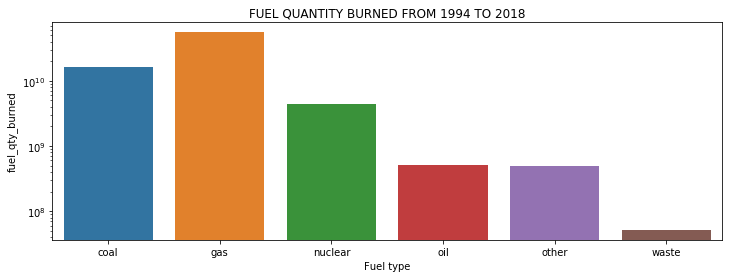

In [132]:
plt.figure(figsize=(12,4))
fuel_burned_plot = sns.barplot(data=fueltype_summary, x='Fuel type', y='fuel_qty_burned')
fuel_burned_plot.set_yscale("log")
plt.title("FUEL QUANTITY BURNED FROM 1994 TO 2018")

Text(0.5, 1.0, 'FUEL ENERGY PER UNIT FROM 1994 TO 2018')

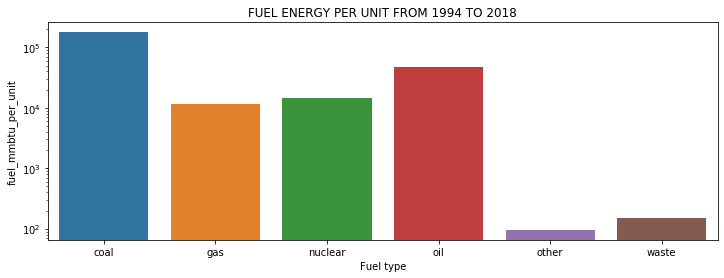

In [133]:
plt.figure(figsize=(12,4))
fuel_burned_plot = sns.barplot(data=fueltype_summary, x='Fuel type', y='fuel_mmbtu_per_unit')
fuel_burned_plot.set_yscale("log")
plt.title("FUEL ENERGY PER UNIT FROM 1994 TO 2018")

Text(0.5, 1.0, 'FUEL COST PER UNIT BURNED FROM 1994 TO 2018')

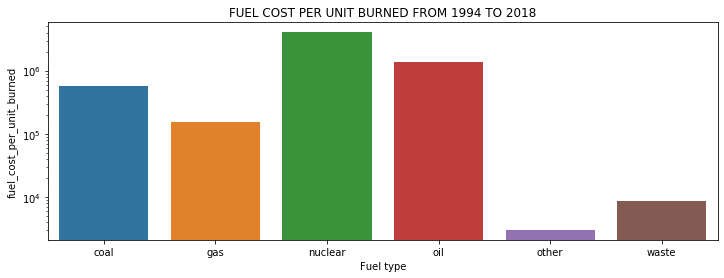

In [134]:
plt.figure(figsize=(12,4))
fuel_burned_plot = sns.barplot(data=fueltype_summary, x='Fuel type', y='fuel_cost_per_unit_burned')
fuel_burned_plot.set_yscale("log")
plt.title("FUEL COST PER UNIT BURNED FROM 1994 TO 2018")

Text(0.5, 1.0, 'FUEL COST PER UNIT DELIVERED FROM 1994 TO 2018')

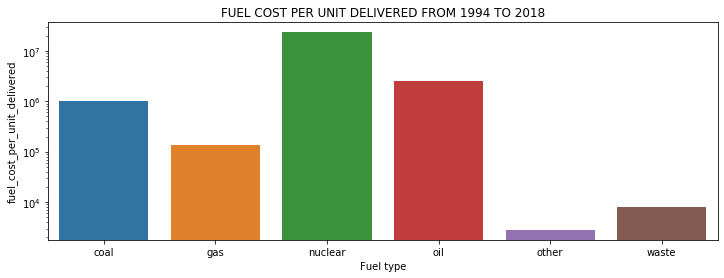

In [135]:
plt.figure(figsize=(12,4))
fuel_burned_plot = sns.barplot(data=fueltype_summary, x='Fuel type', y='fuel_cost_per_unit_delivered')
fuel_burned_plot.set_yscale("log")
plt.title("FUEL COST PER UNIT DELIVERED FROM 1994 TO 2018")

Text(0.5, 1.0, 'FUEL COST PER ENERGY FROM 1994 TO 2018')

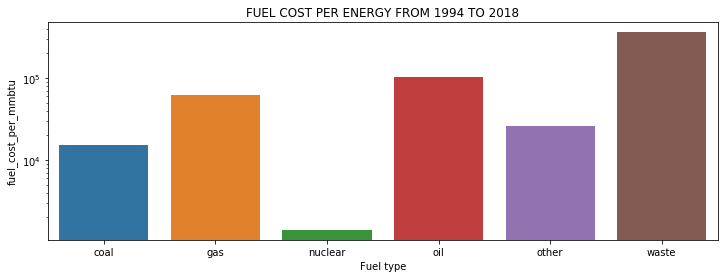

In [136]:
plt.figure(figsize=(12,4))
fuel_burned_plot = sns.barplot(data=fueltype_summary, x='Fuel type', y='fuel_cost_per_mmbtu')
fuel_burned_plot.set_yscale("log")
plt.title("FUEL COST PER ENERGY FROM 1994 TO 2018")

MORE BAR PLOTS & KDE PLOTS

In [152]:
coal = fuel_type.loc['coal']
coal.reset_index(inplace=True)
coal

,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,7.172082e+08,10293.429297,14984.572,59215.371,682.14697
1,1995,1.257398e+09,10262.019015,14571.785,13704.146,663.74149
2,1996,6.988514e+08,9269.878000,12694.803,12087.581,581.57661
3,1997,8.169024e+08,9000.095755,43742.178,11308.641,551.68662
4,1998,8.982095e+08,9212.781694,11902.597,308602.749,557.06574
5,1999,8.805301e+08,9052.256583,16303.468,14774.389,540.98716
6,2000,8.620492e+08,8584.171000,100428.831,69796.564,506.31631
7,2001,8.564316e+08,7574.081578,15109.012,14209.655,474.98225
8,2002,8.144357e+08,6967.923735,9171.164,8667.629,442.40938
9,2003,8.018815e+08,6906.303079,30954.110,8791.737,439.63376


Text(0.5, 1.0, 'COAL QUANTITY BURNED IN THE U.S FROM 1994 TO 2018')

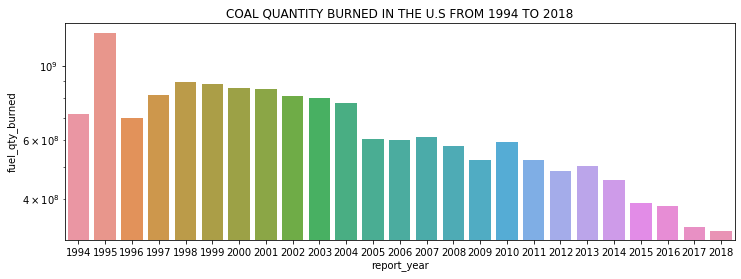

In [195]:
plt.figure(figsize=(12,4))
coal_burned_plot = sns.barplot(data=coal, x='report_year', y='fuel_qty_burned')
coal_burned_plot.set_yscale("log")
plt.title("COAL QUANTITY BURNED IN THE U.S FROM 1994 TO 2018")

Text(0, 0.5, 'Probability Density')

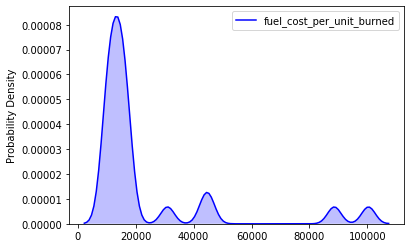

In [209]:
sns.kdeplot(coal["fuel_cost_per_unit_burned"], shade=True, color="b")
plt.ylabel("Probability Density")

In [164]:
gas = fuel_type.loc['gas']
gas.reset_index(inplace=True)
gas

,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,2.432212e+09,498.035534,10792.496,8099.070,1368.51941
1,1995,2.570880e+09,513.394734,9087.905,6579.786,1215.67299
2,1996,1.915218e+09,434.236843,1467.390,1315.040,1317.92815
3,1997,2.039925e+09,456.865725,1518.471,5378.348,1500.72369
4,1998,2.554651e+09,526.381050,7475.596,4692.188,1497.21333
5,1999,2.416453e+09,502.719878,16767.895,5404.161,1489.90376
6,2000,2.311988e+09,482.765171,10024.878,9104.637,2211.16230
7,2001,2.031479e+09,462.697102,10360.348,10132.907,2285.87893
8,2002,1.565940e+09,449.771291,3584.279,3422.406,2152.42920
9,2003,1.262430e+09,409.852719,7170.143,6682.986,2557.46303


Text(0.5, 1.0, 'GAS QUANTITY BURNED IN THE U.S FROM 1994 TO 2018')

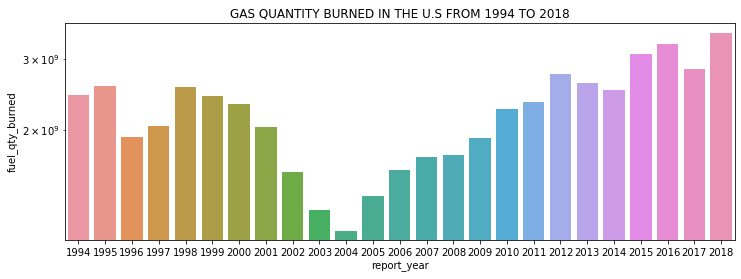

In [194]:
plt.figure(figsize=(12,4))
coal_burned_plot = sns.barplot(data=gas, x='report_year', y='fuel_qty_burned')
coal_burned_plot.set_yscale("log")
plt.title("GAS QUANTITY BURNED IN THE U.S FROM 1994 TO 2018")

Text(0, 0.5, 'Probability Density')

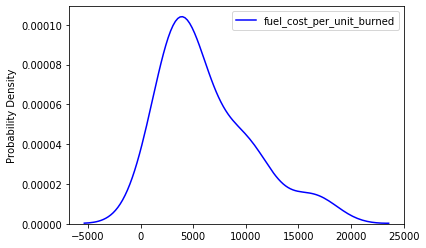

In [208]:
sns.kdeplot(gas["fuel_cost_per_unit_burned"], shade=False, color="b")
plt.ylabel("Probability Density")

In [175]:
nuclear = fuel_type.loc['nuclear']
nuclear.reset_index(inplace=True)
nuclear

,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,206936645.0,1384.184311,227983.354,3.483492e+03,136.534
1,1995,205408058.0,1365.809151,384152.639,3.211016e+03,142.150
2,1996,148738376.0,1091.261603,66657.887,9.911224e+06,14.001
3,1997,162556374.0,809.236891,112593.911,1.216630e+07,61.854
4,1998,150463637.0,1716.963500,117788.269,2.963624e+03,224.959
5,1999,144288470.0,1176.120881,62915.808,2.839616e+03,221.615
6,2000,191332015.0,1178.969954,112375.382,1.169735e+06,127.013
7,2001,227524165.0,563.574596,59292.078,2.851762e+03,15.105
8,2002,191259386.0,407.179172,59958.884,2.894303e+03,13.779
9,2003,188195311.0,341.599992,59591.536,2.694920e+03,13.438


Text(0.5, 1.0, 'NUCLEAR QUANTITY BURNED IN THE U.S FROM 1994 TO 2018')

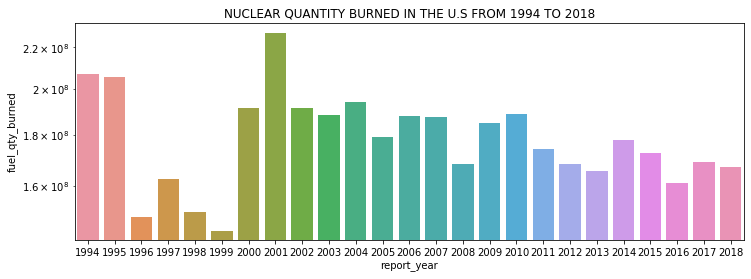

In [193]:
plt.figure(figsize=(12,4))
nuke_burned_plot = sns.barplot(data=nuclear, x='report_year', y='fuel_qty_burned')
nuke_burned_plot.set_yscale("log")
plt.title("NUCLEAR QUANTITY BURNED IN THE U.S FROM 1994 TO 2018")

Text(0, 0.5, 'Probability Density')

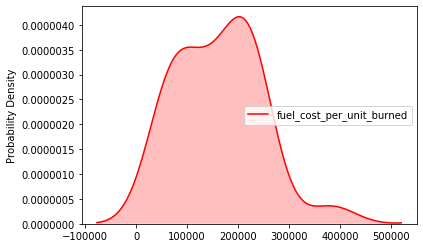

In [207]:
sns.kdeplot(nuclear["fuel_cost_per_unit_burned"], shade=True, color="r")
plt.ylabel("Probability Density")

In [185]:
oil = fuel_type.loc['oil']
oil.reset_index(inplace=True)
oil

,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,1469716.0,960.537684,9362.194,7622.838,1147.21573
1,1995,809178.0,640.517724,17858.281,15841.994,787.26450
2,1996,3637754.0,929.977902,5357.028,81145.381,1027.16797
3,1997,53849314.0,942.374958,5387.536,4106.591,986.20660
4,1998,543608.0,391.821612,2608.657,1204.335,490.02500
5,1999,640093.0,271.954956,29654.510,3459.609,348.50989
6,2000,23157705.0,2416.735440,104055.470,104584.963,2598.86316
7,2001,30308989.0,2751.141748,95315.421,53955.824,3138.99512
8,2002,11179575.0,2173.726548,48956.627,42121.633,2347.96657
9,2003,32432269.0,2510.304203,51349.250,49133.843,2945.46526


Text(0.5, 1.0, 'OIL QUANTITY BURNED IN THE U.S FROM 1994 TO 2018')

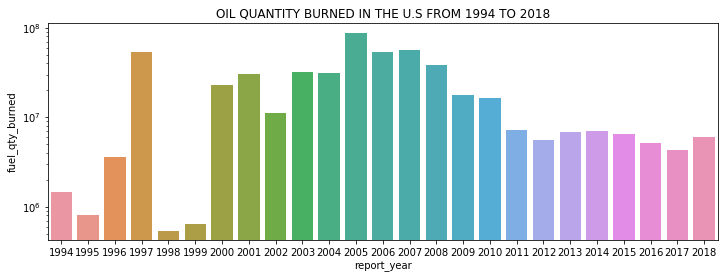

In [192]:
plt.figure(figsize=(12,4))
oil_burned_plot = sns.barplot(data=oil, x='report_year', y='fuel_qty_burned')
oil_burned_plot.set_yscale("log")
plt.title("OIL QUANTITY BURNED IN THE U.S FROM 1994 TO 2018")

Text(0, 0.5, 'Probability Density')

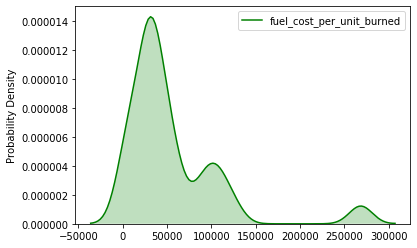

In [206]:
sns.kdeplot(oil["fuel_cost_per_unit_burned"], shade=True, color="g")
plt.ylabel("Probability Density")

In [188]:
other = fuel_type.loc['other']
other.reset_index(inplace=True)
other

,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,5094458.0,1.287506,116.737,117.148,27.974
1,1995,422054754.0,2.363363,183.577,167.543,33.712
2,1996,1144943.0,0.788831,160.075,163.310,17.935
3,1997,3211371.0,1.953651,153.923,149.671,291.696
4,1998,11577962.0,2.225648,225.428,178.843,288.432
5,1999,2324239.0,83.590448,271.579,232.658,264.035
6,2000,4302104.0,2.410105,100.014,107.318,350.013
7,2001,715770.0,0.056907,71.283,65.550,330.181
8,2002,1293296.0,0.057613,-4.257,-4.867,2535.697
9,2003,1099465.0,0.057861,-51.286,-50.600,2785.202


Text(0.5, 1.0, 'OTHER FUEL QUANTITY BURNED IN THE U.S FROM 1994 TO 2018')

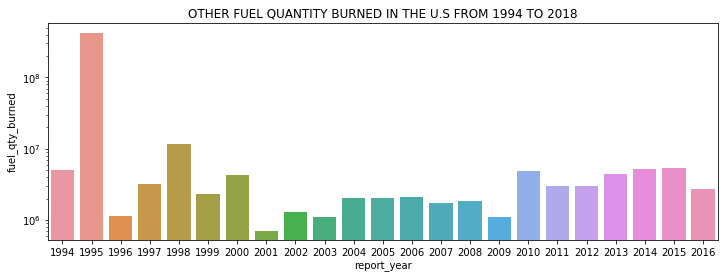

In [191]:
plt.figure(figsize=(12,4))
other_burned_plot = sns.barplot(data=other, x='report_year', y='fuel_qty_burned')
other_burned_plot.set_yscale("log")
plt.title("OTHER FUEL QUANTITY BURNED IN THE U.S FROM 1994 TO 2018")

Text(0, 0.5, 'Probability Density')

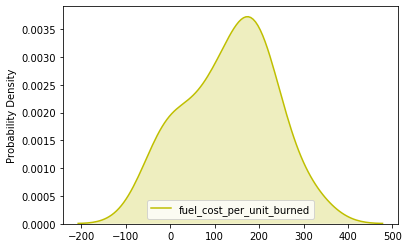

In [205]:
sns.kdeplot(other["fuel_cost_per_unit_burned"], shade=True, color="y")
plt.ylabel("Probability Density")

In [201]:
waste = fuel_type.loc['waste']
waste.reset_index(inplace=True)
waste

,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,1242241.0,0.577288,52.762,52.615,450.027
1,1995,1642051.0,0.337080,-192.699,-189.427,602.933
2,1996,1102632.0,0.364899,88.092,80.826,-25.491
3,1997,1528774.0,0.382760,137.433,134.873,13.987
4,1998,1624599.0,0.221197,238.109,238.204,15.184
5,1999,1108979.0,0.186733,143.025,118.775,12.213
6,2000,1271108.0,0.152991,-489.141,-425.717,-15.231
7,2001,1361951.0,0.160667,217.499,212.639,9.622
8,2002,1394020.0,8.665753,254.438,250.101,10.388
9,2003,1082223.0,8.818894,161.973,155.604,6.981


Text(0.5, 1.0, 'WASTE FUEL QUANTITY BURNED IN THE U.S FROM 1994 TO 2018')

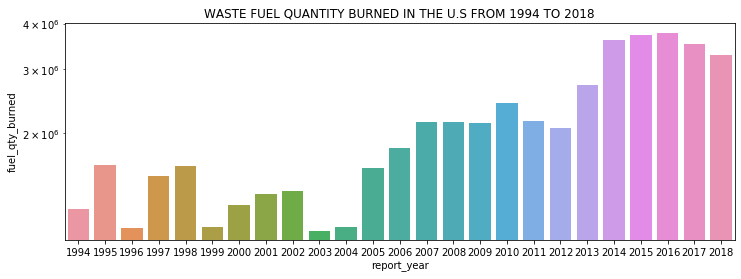

In [202]:
plt.figure(figsize=(12,4))
waste_burned_plot = sns.barplot(data=waste, x='report_year', y='fuel_qty_burned')
waste_burned_plot.set_yscale("log")
plt.title("WASTE FUEL QUANTITY BURNED IN THE U.S FROM 1994 TO 2018")

Text(0, 0.5, 'Probability Density')

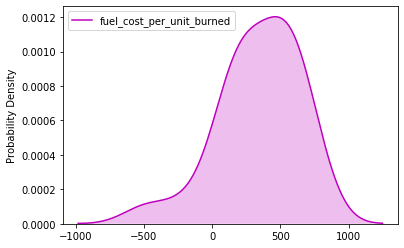

In [220]:
sns.kdeplot(waste["fuel_cost_per_unit_burned"], shade=True, color="m")
plt.ylabel("Probability Density")